In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter("ignore")

In [41]:
df=pd.read_csv("../data/raw/loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [42]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

# **Data Understanding**
* **loan_id**  A unique identifier assigned to each loan application.
* **no_of_dependents**  The number of people financially dependent on the loan applicant (e.g., children, spouse, elderly parents).
* **education** Indicates the highest level of education achieved by the applicant (e.g., graduate, undergraduate, high school).
* **self_employed**  A binary variable (e.g., Yes/No) indicating whether the applicant is self-employed or salaried.
* **income_annum**   The applicant's annual income.
* **loan_amount**     The amount of money requested by the applicant as a loan
* **loan_term**       The duration (in years) for which the loan is issued.
* **cibil_score**  A three-digit credit score assigned by the Credit Information Bureau (India) Limited (CIBIL), typically ranging from 300 to 900.
* **residential_assets_value**  The monetary value of the applicant's residential properties.
* **commercial_assets_value**   The monetary value of commercial properties owned by the applicant.
* **luxury_assets_value**       The value of luxury assets (e.g., high-end cars, yachts, art collections) owned by the applicant.
* **bank_asset_value**          The total value of liquid assets (e.g., savings, fixed deposits) held in bank accounts by the applicant.
* **loan_status**               The current status of the loan application (e.g., Approved, Rejected, Pending).

**Data Exploration**

In [43]:
df["loan_id"].nunique()
# all records are unique

4269

In [44]:
df.isnull().sum()
# no missing value

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [45]:
df.columns = df.columns.str.replace(' ', '')
#removing the sapce from the columns name

In [46]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [47]:
df.info()
#data types are correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [48]:
df.drop(columns=["loan_id"],inplace=True)

In [49]:
def unique_value(data):
    for i in data.columns:
        if data[i].dtype == "object":  # Checking the dtype of the column
            u = data[i].unique()  # Get unique values
            print(f"Unique values of {i}: {u}")

In [50]:
unique_value(df)

Unique values of education: [' Graduate' ' Not Graduate']
Unique values of self_employed: [' No' ' Yes']
Unique values of loan_status: [' Approved' ' Rejected']


In [51]:
df["education"]=df["education"].str.lstrip(" ")
df["self_employed"]=df["self_employed"].str.lstrip(" ")
df["loan_status"]=df["loan_status"].str.lstrip(" ")

In [52]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Summary statistics
display(df[numeric_cols].describe().T)

# Skewness
for col in numeric_cols:
    print(f"Skewness of {col}: {df[col].skew():.2f}")


,count,mean,std,min,25%,50%,75%,max
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


Skewness of no_of_dependents: -0.02
Skewness of income_annum: -0.01
Skewness of loan_amount: 0.31
Skewness of loan_term: 0.04
Skewness of cibil_score: -0.01
Skewness of residential_assets_value: 0.98
Skewness of commercial_assets_value: 0.96
Skewness of luxury_assets_value: 0.32
Skewness of bank_asset_value: 0.56


In [53]:
df[df["residential_assets_value"]<0]
# to avoid null value -10000 is imputed so we will change it to 0 that means they dont have any residential assest

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
59,4,Not Graduate,Yes,5500000,18200000,16,797,-100000,4900000,18600000,4800000,Approved
196,4,Not Graduate,Yes,400000,1500000,2,669,-100000,600000,900000,500000,Approved
559,2,Graduate,Yes,200000,500000,6,885,-100000,0,300000,200000,Rejected
702,4,Graduate,Yes,6300000,23900000,6,899,-100000,11400000,20600000,6700000,Approved
737,2,Graduate,Yes,900000,2500000,16,458,-100000,100000,3200000,1100000,Rejected
784,0,Graduate,No,5000000,14400000,2,761,-100000,7300000,12600000,4500000,Approved
904,2,Graduate,No,4100000,14900000,12,571,-100000,5200000,13000000,3400000,Approved
1089,3,Graduate,No,5100000,11000000,6,336,-100000,5800000,11600000,7500000,Rejected
1163,2,Graduate,No,4500000,9100000,18,593,-100000,600000,12400000,2500000,Approved
1350,5,Graduate,No,4000000,13700000,6,496,-100000,1400000,15800000,3700000,Rejected


In [54]:
df['residential_assets_value'] = df['residential_assets_value'].replace(-10000, 0)
# they dont have any rsidential assests

In [55]:
outliers = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    out = df[(df[col] < lower) | (df[col] > upper)]
    if not out.empty:
        outliers[col] = out
        print(f"{col}: {out.shape[0]} outliers")


residential_assets_value: 52 outliers
commercial_assets_value: 37 outliers
bank_asset_value: 5 outliers


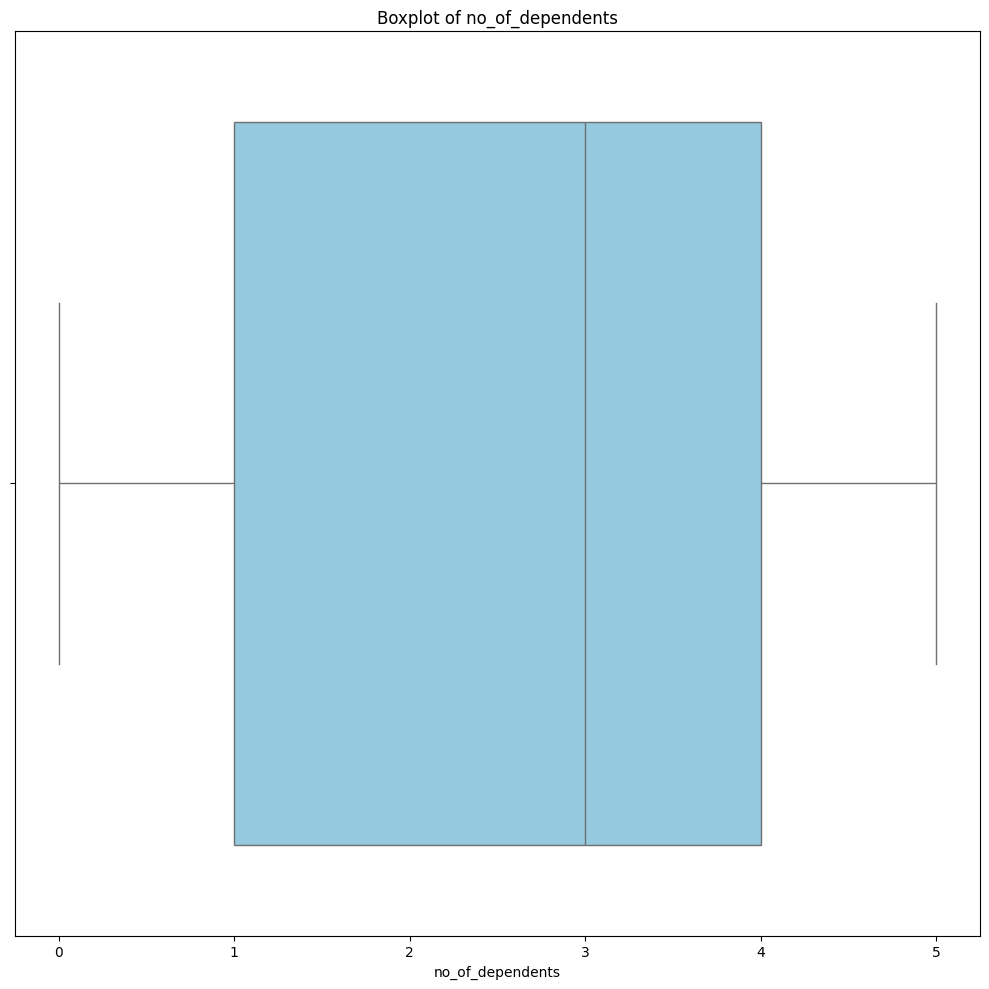

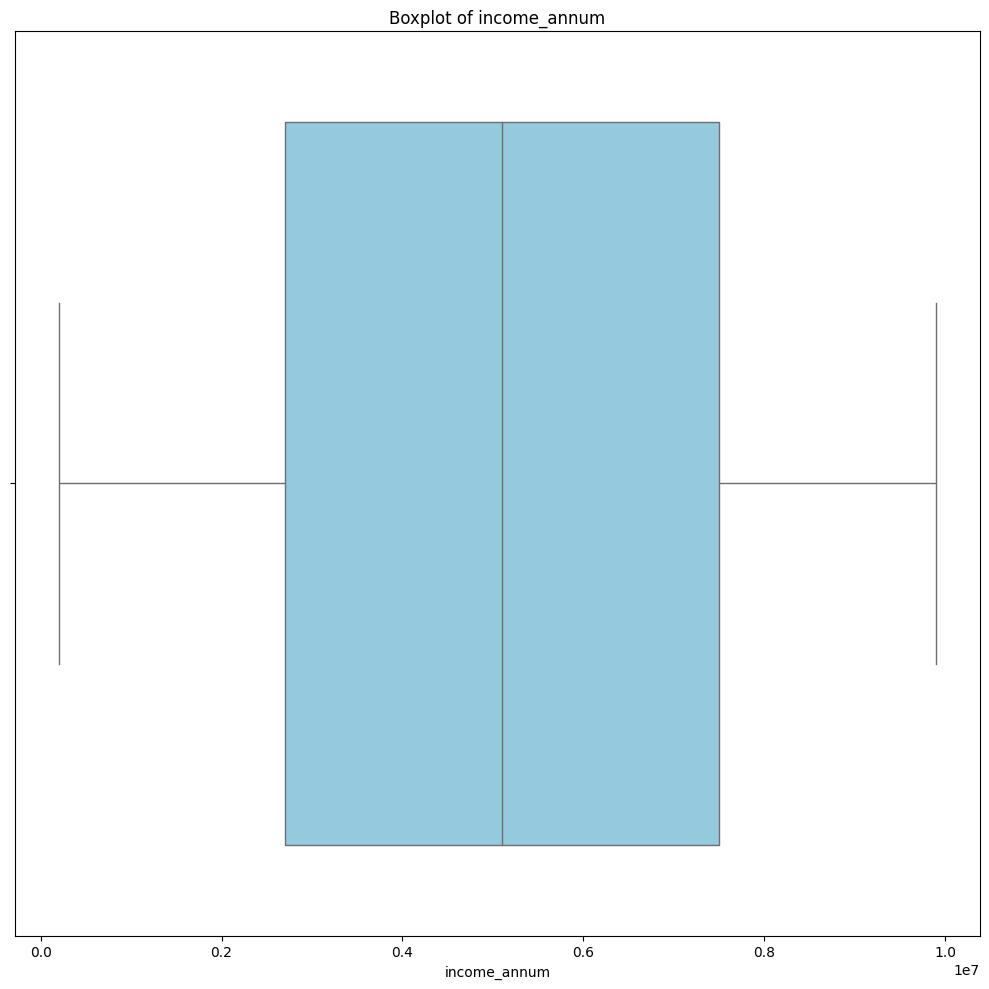

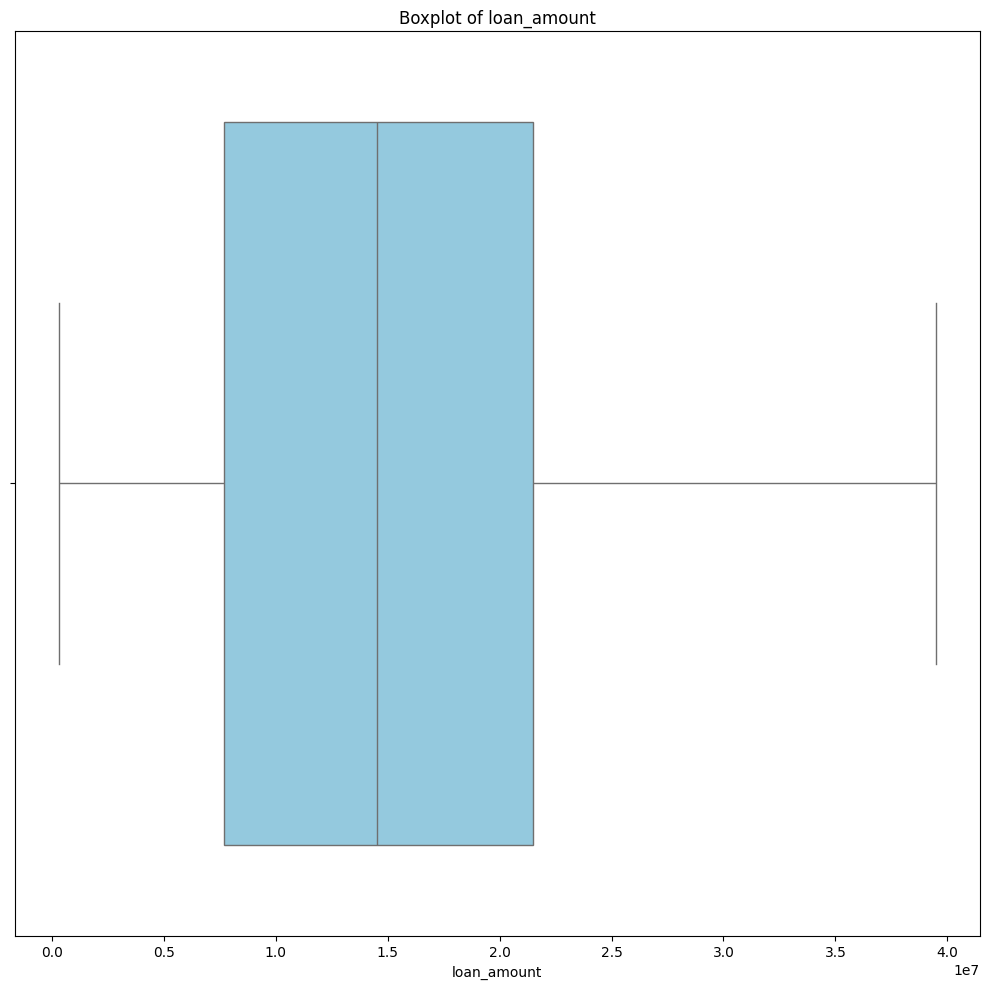

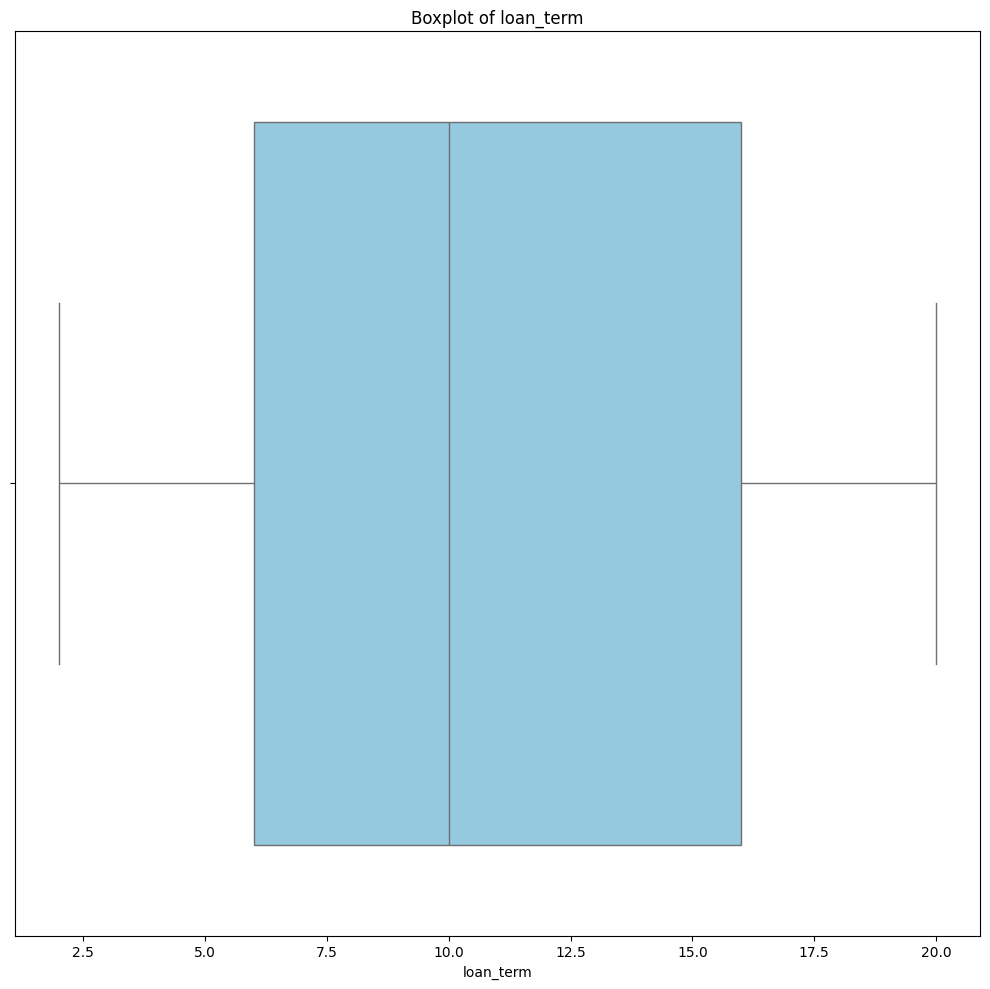

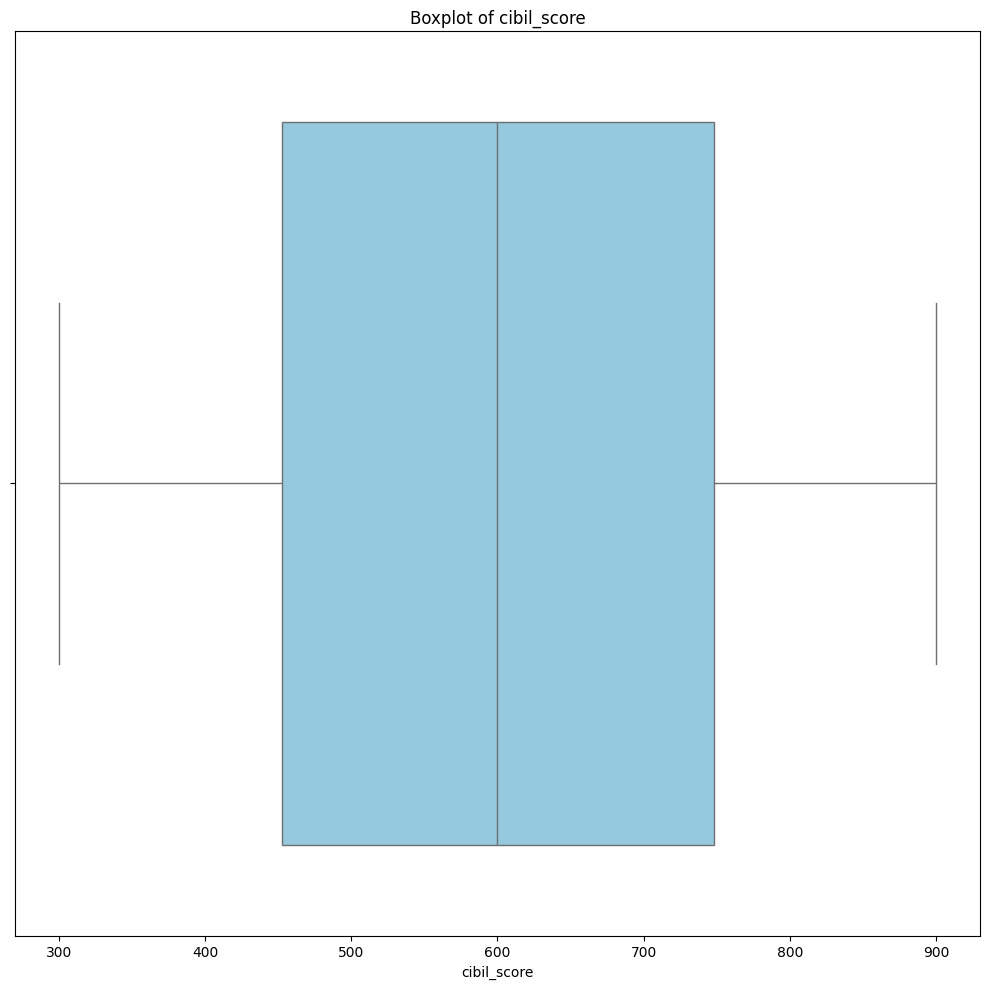

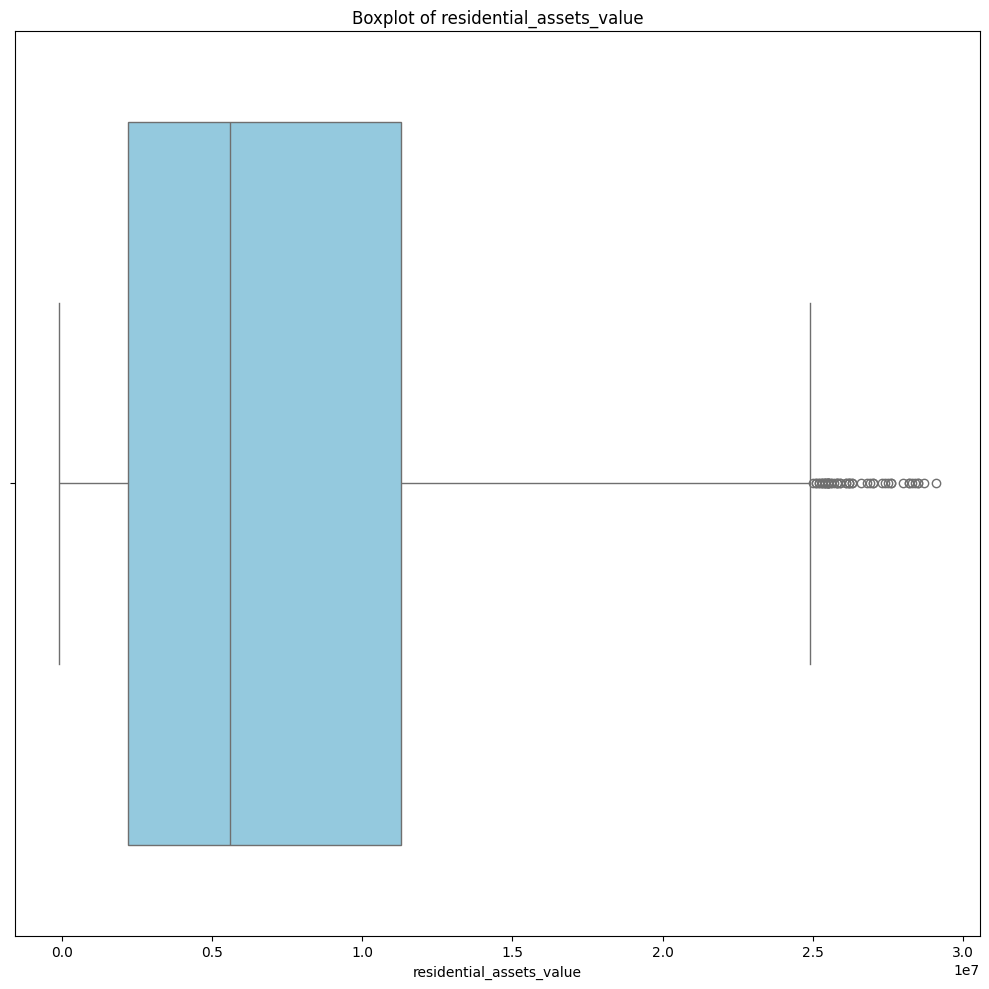

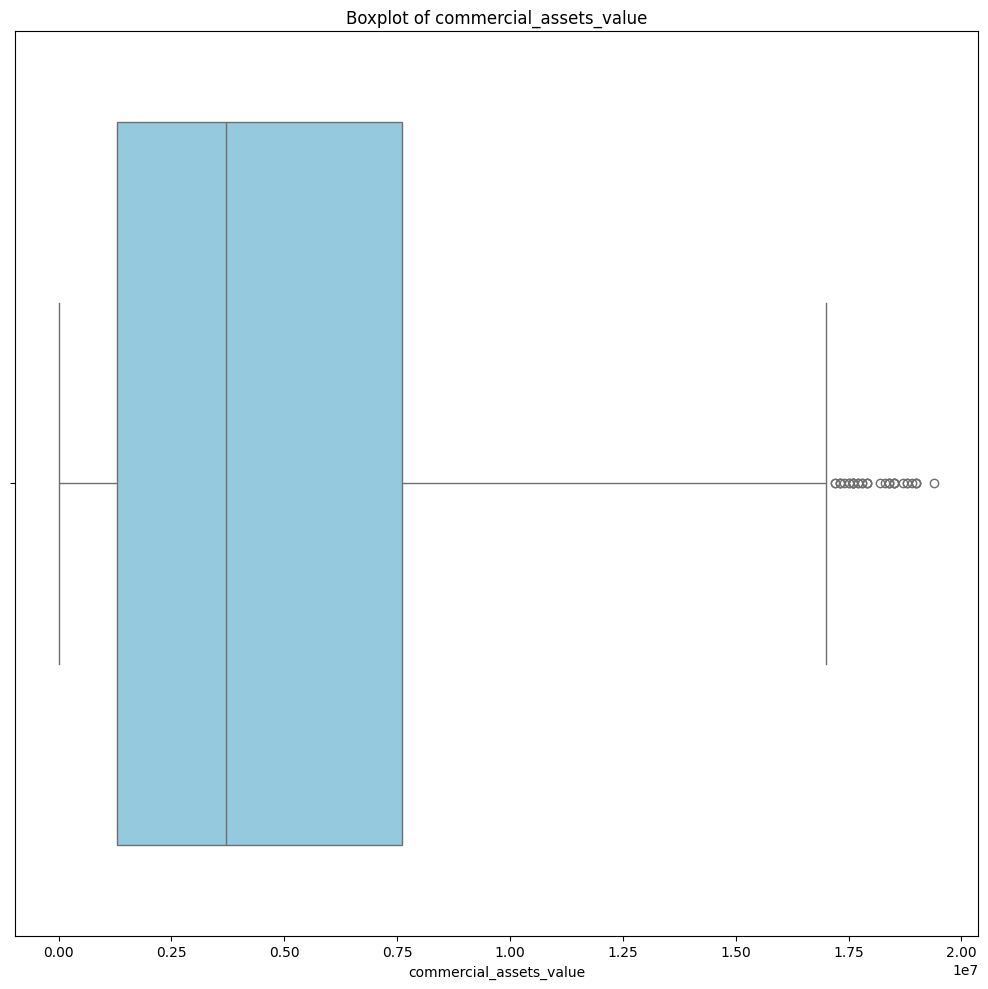

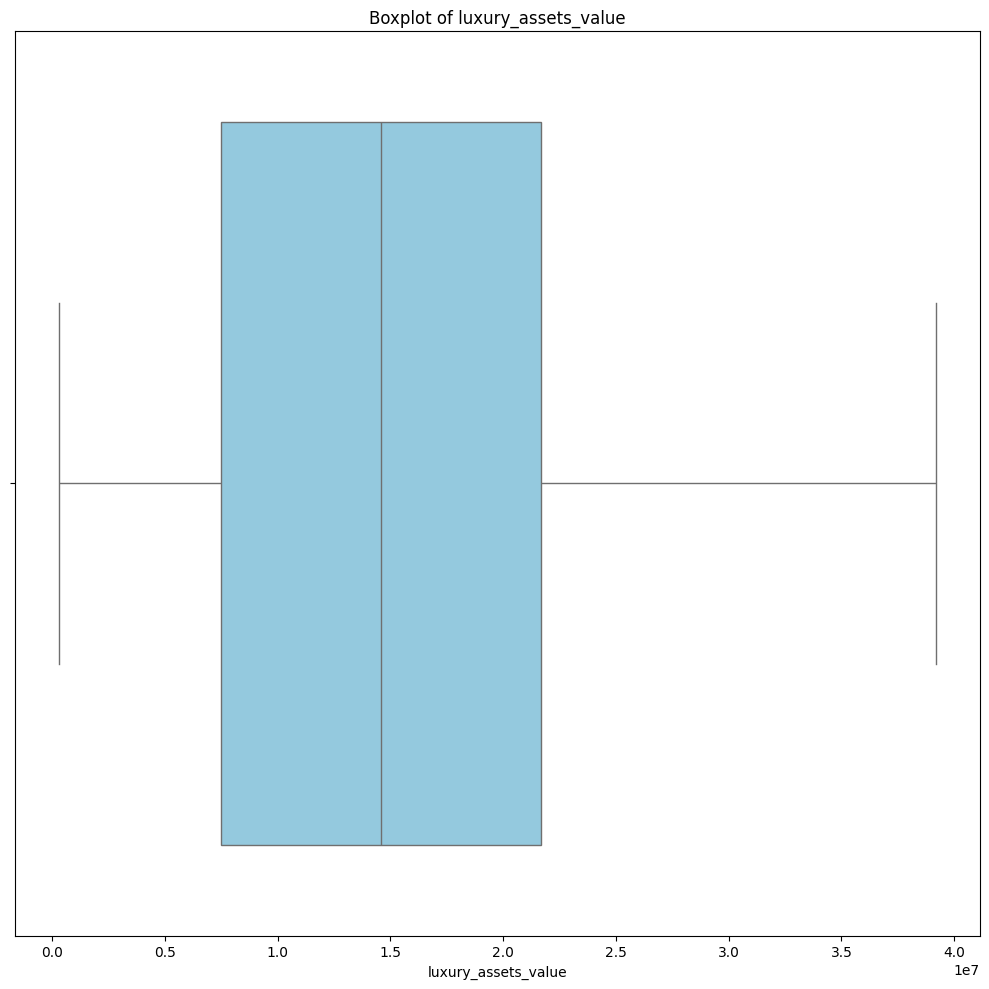

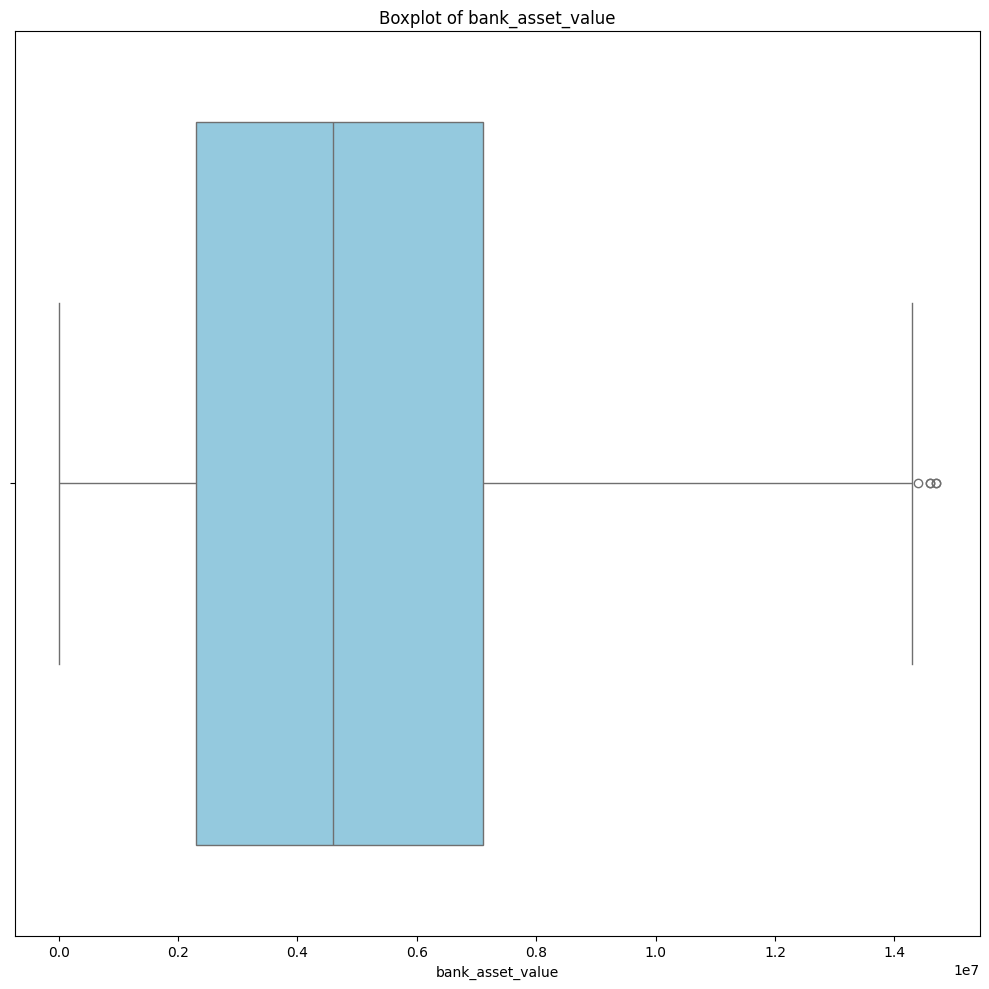

In [56]:
for col in numeric_cols:
    plt.figure(figsize=(10,10))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()



📌 Value counts for education:
education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64


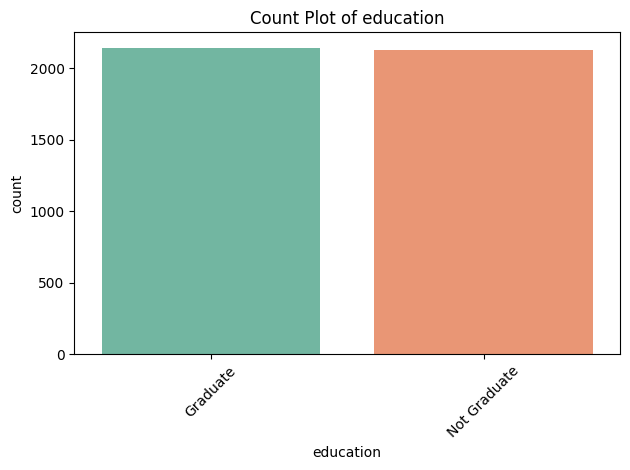


📌 Value counts for self_employed:
self_employed
Yes    2150
No     2119
Name: count, dtype: int64


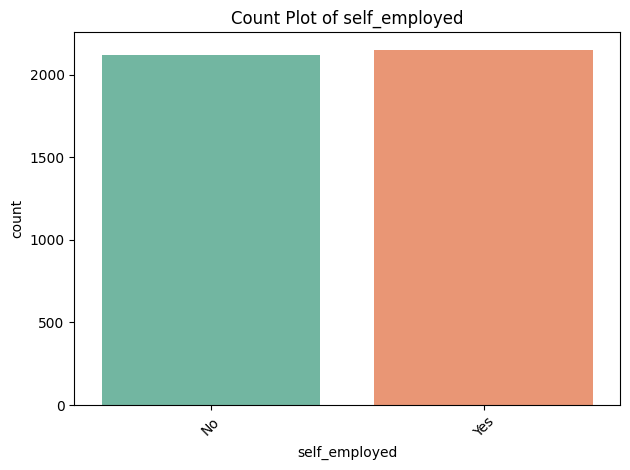


📌 Value counts for loan_status:
loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


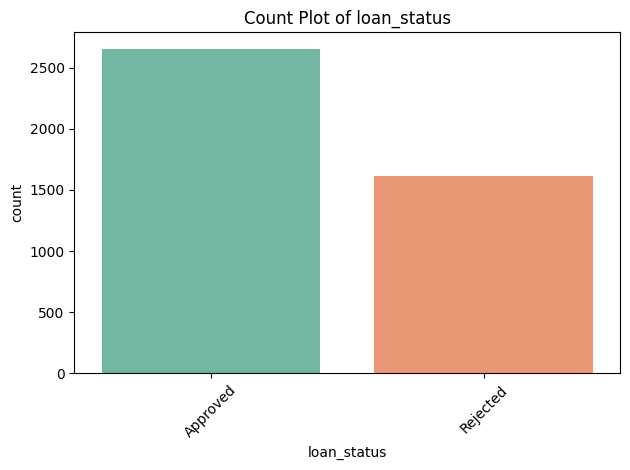

In [57]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\n📌 Value counts for {col}:")
    print(df[col].value_counts())
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


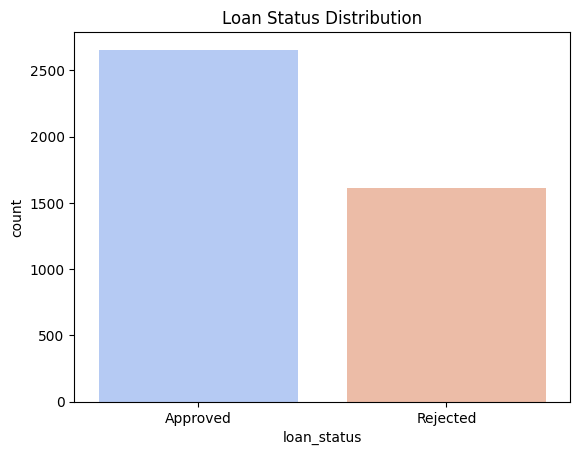

In [58]:
sns.countplot(data=df, x="loan_status", palette="coolwarm")
plt.title("Loan Status Distribution")
plt.show()


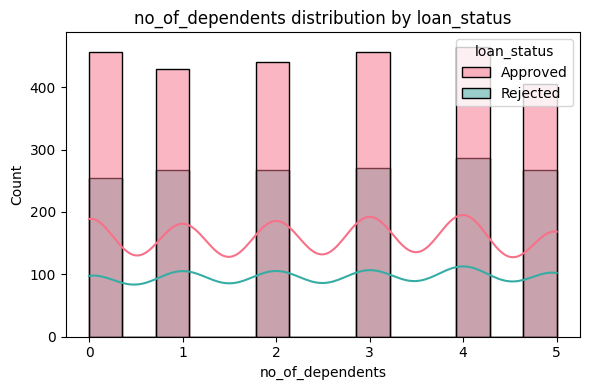

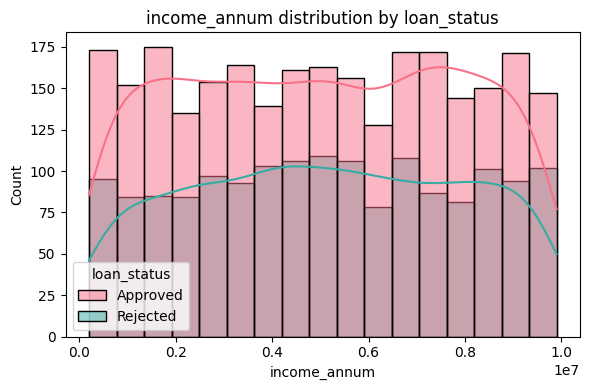

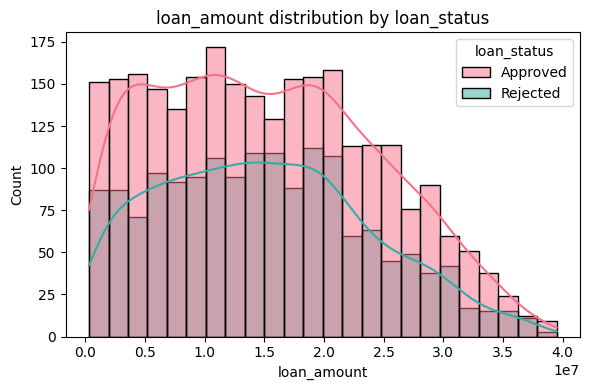

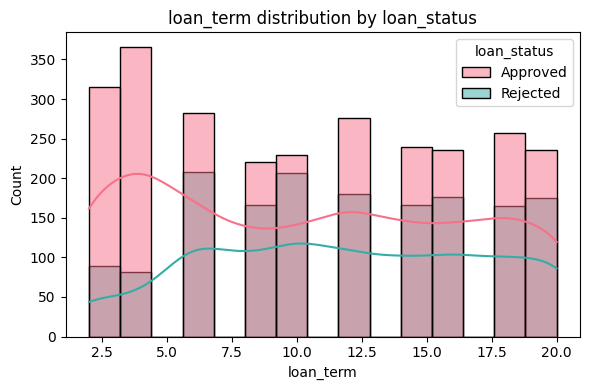

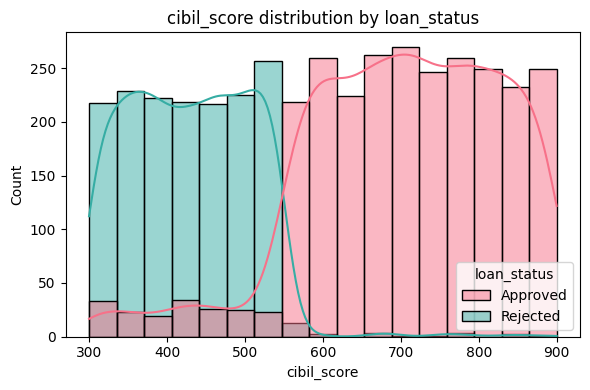

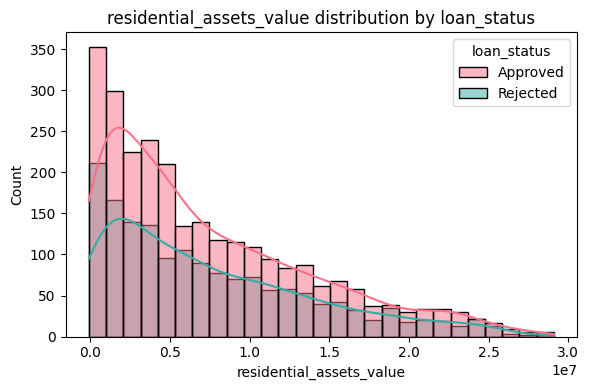

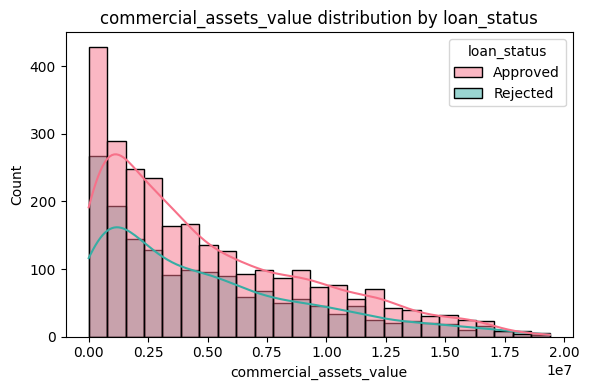

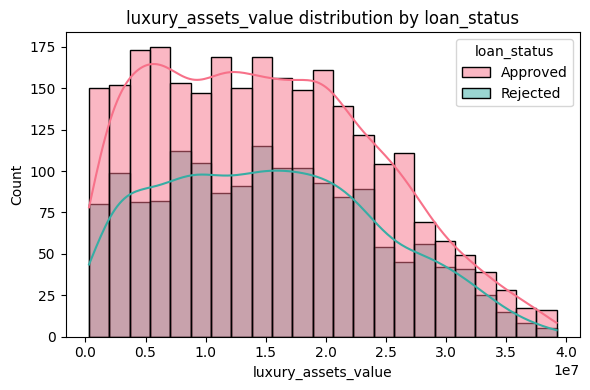

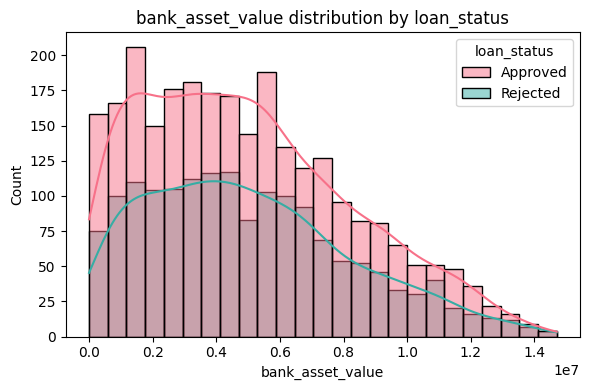

In [59]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue="loan_status", kde=True, palette="husl")
    plt.title(f"{col} distribution by loan_status")
    plt.tight_layout()
    plt.show()


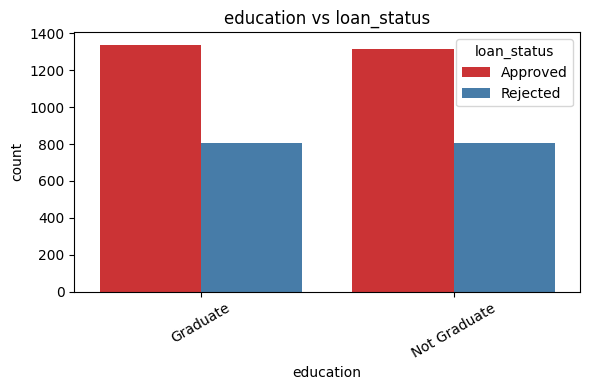

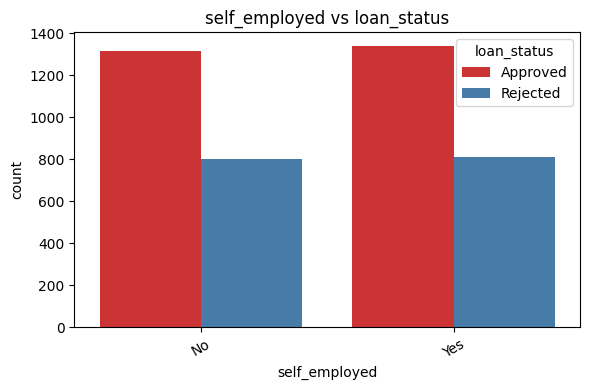

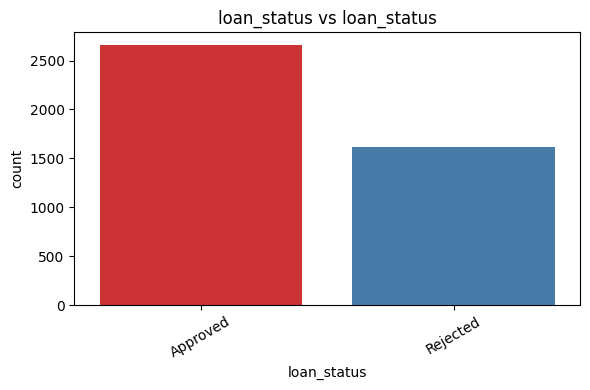

In [60]:
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue="loan_status", palette="Set1")
    plt.title(f"{col} vs loan_status")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


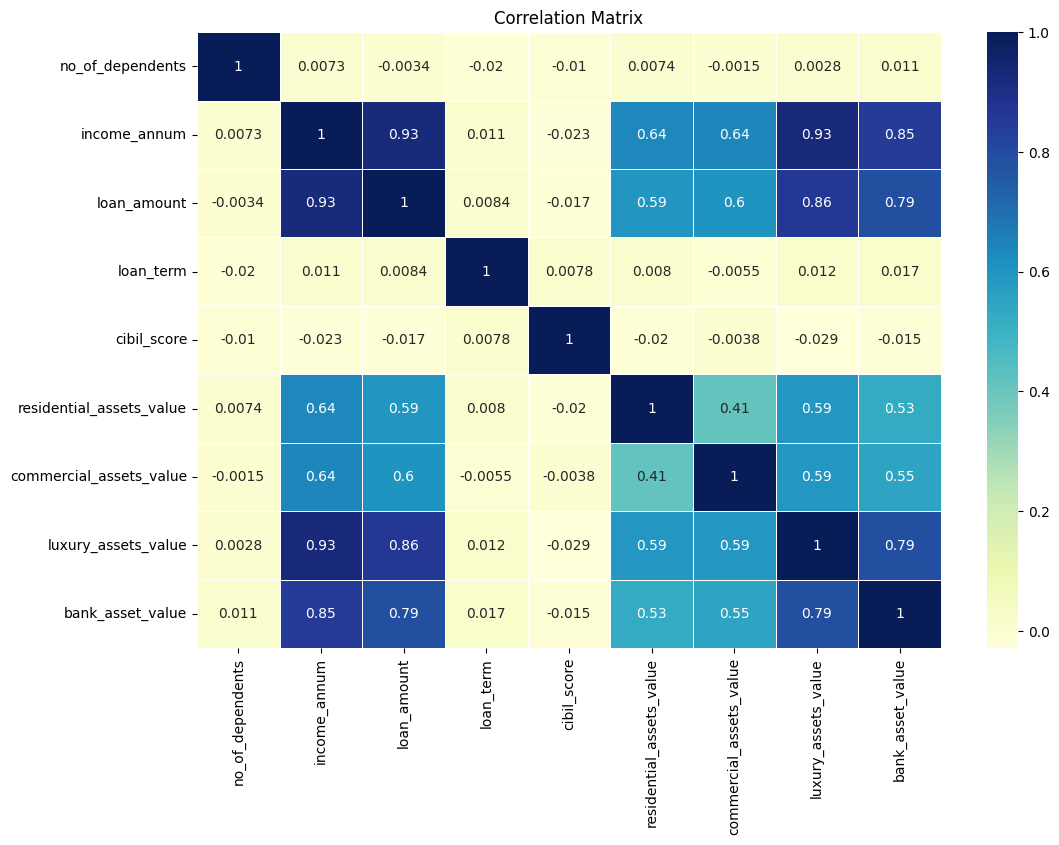

In [61]:
plt.figure(figsize=(12, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [62]:
df[df["residential_assets_value"]<0]
# to avoid null value -10000 is imputed so we will change it to 0 that means they dont have any residential assest

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
59,4,Not Graduate,Yes,5500000,18200000,16,797,-100000,4900000,18600000,4800000,Approved
196,4,Not Graduate,Yes,400000,1500000,2,669,-100000,600000,900000,500000,Approved
559,2,Graduate,Yes,200000,500000,6,885,-100000,0,300000,200000,Rejected
702,4,Graduate,Yes,6300000,23900000,6,899,-100000,11400000,20600000,6700000,Approved
737,2,Graduate,Yes,900000,2500000,16,458,-100000,100000,3200000,1100000,Rejected
784,0,Graduate,No,5000000,14400000,2,761,-100000,7300000,12600000,4500000,Approved
904,2,Graduate,No,4100000,14900000,12,571,-100000,5200000,13000000,3400000,Approved
1089,3,Graduate,No,5100000,11000000,6,336,-100000,5800000,11600000,7500000,Rejected
1163,2,Graduate,No,4500000,9100000,18,593,-100000,600000,12400000,2500000,Approved
1350,5,Graduate,No,4000000,13700000,6,496,-100000,1400000,15800000,3700000,Rejected


In [63]:
df["total_assest"]=df["residential_assets_value"]+df["commercial_assets_value"]+df["luxury_assets_value"]+df["bank_asset_value"]

df.drop(columns=['residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'],inplace=True)

In [64]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_assest
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,50700000
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,17000000
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,57700000
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,52700000
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,55000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected,7400000
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,20000000
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,39000000
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved,28800000
